### Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


## Test P1 (2023/1): time and frequency domain analysis of sdof systems

---


In [2]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from MRPy import *


## Questão 1

Uma pessoa com massa $m = 80$kg impacta verticalmente a extremidade de um trampolim com velocidade $v = 3$m/s. O trampolim tem comprimento $L = 2$m, massa por unidade de comprimento $\mu = 20$kg/m, e amortecimento $\zeta = 2$% (razão do crítico). A rigidez à flexão, $EI$, é tal que o deslocamento estático sob o peso da pessoa é 0,1m. Pergunta-se:

1. Qual o máximo deslocamento na extremidade do trampolim após o impacto?
2. Qual o tempo transcorrido até que a pessoa perca o contato com o trampolim ao ser projetada de volta para cima?
3. Quantos ciclos de vibração o trampolim completará antes que a pessoa volte a cair impactando o mesmo pela segunda vez?
4. Quais as máximas reações de apoio $M_A$ (momento) e $V_A$ (força vertical)? 

<img src="resources/tests/PEC00025A_231_P1_Q1.JPG" alt="Question 1" width="480px"/>


### Cálculo das propriedades do sistema


In [3]:
L  =  2.             # comprimento do trampolim (m)
vp =  3.             # velocidade da pessoa no contato (m/s)

mp =  80.            # massa da pessoa (kg)
mt =  20*L/2         # massa do trampolim (metade da massa total, kg)
m  =  mp + mt        # massa oscilante total (kg)

zt =  0.02           # amortecimento razão do crítico
ue =  0.1            # deslocamento estático sob o peso da pessoa (m)
g  =  9.81           # gravidade (m/s2)

k  =  mp*g/ue        # coeficiente de rigidez
Q  =  mp*vp          # quantidade de movimento inicial
v0 =  Q/m            # velocidade pessoa+trampolim após contato
wn =  np.sqrt(k/m)   # frequência natural (rad/s)
fn =  wn/2/np.pi     # frequência natural (Hz)

print('Rigidez do trampolim:                     {0:5.0f} N/m.'.format(k))
print('Massa total (pessoa + trampolim):         {0:5.1f} kg.'.format(m))
print('Velocidade inicial (pessoa + trampolim):  {0:5.2f} m/s.'.format(v0))
print('Frequência natural do sistema:            {0:5.2f} Hz.'.format(fn))


Rigidez do trampolim:                      7848 N/m.
Massa total (pessoa + trampolim):         100.0 kg.
Velocidade inicial (pessoa + trampolim):   2.40 m/s.
Frequência natural do sistema:             1.41 Hz.


### 1) Deslocamento máximo

Após o contato, a massa da pessoa se soma à massa (parcial) do trampolim com uma velocidade inicial dada.
O deslocamento máximo tem duas parcelas:

1. um deslocamento devido a uma velocidade inicial, mais
2. um deslocamento devido a uma força impulsiva retangular de duração infinita, com fator de amplificação A = 2. 

<img src="images/dynamic_factors.jpg" alt="Dynamic factors" width="480px"/>

Na verdade esses dois deslocamentos de pico não acontecerão exatamente no mesmo instante e, portanto,
simplesmente somá-los é uma simplificação que resulta em um deslocamento total superestimado. 
Além disso, ao se desprezar o efeito do amortecimento na amplitude observada após 1/4 do período,
o deslocamento máximo devido à velocidade inicial também é um pouco superestimado.


In [4]:
umax_1 = v0/wn      # parcela referente à conservação da quantidade de moviment
umax_2 = 2*ue       # parcela referente à força impulsiva 

umax   = umax_1 + umax_2

print('Deslocamento devido à velocidade inicial: {0:5.2f} m.'.format(umax_1))
print('Deslocamento devido à força impulsiva:    {0:5.2f} m.'.format(umax_2))
print('Deslocamento máximo total:                {0:5.2f} m.'.format(umax))


Deslocamento devido à velocidade inicial:  0.27 m.
Deslocamento devido à força impulsiva:     0.20 m.
Deslocamento máximo total:                 0.47 m.


O cálculo abaixo, obviamente não exigido na prova, apresenta o resultado correto para essa questão utilizado
uma integração por Duhamel.


Deslocamento máximo total (por Duhamel):   0.38 m.


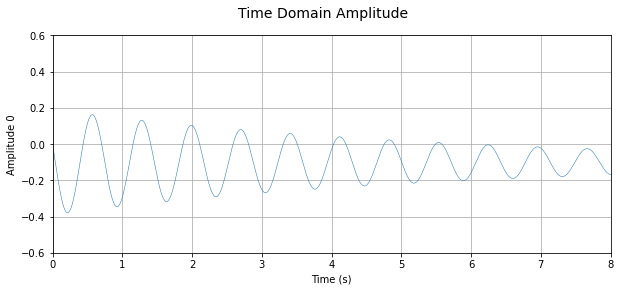

In [5]:
F = MRPy(-mp*g*np.ones((1,1024)), Td=8)/m         # força constante a partir de t = 0
u = F.sdof_Duhamel(fn, zt, V0=-v0)                # resolve por Duhamel, com velocidade inicial dada

u.plot_time(fig=2, figsize=[10,4], axis_t=[0, u.Td, -0.6, 0.6]);

u_pk = np.max(np.abs(u[0]))
print('Deslocamento máximo total (por Duhamel):  {0:5.2f} m.'.format(u_pk))


O que confirma que a simples superposição dos dois efeitos superestima o pico de deslocamento.


### 2) Tempo até nova perda de contato

A resposta devida à velocidade inicial reverte o sinal e é maior que a resposta devida à força impulsiva,
que não reverte o sinal. Portanto a resposta total terá reversão de sinal, como de fato pode ser observado
no gráfico da solução por Duhamel.

Pode-se então supor que o contato só será desfeito no momento em que o deslocamento atinge o pico com o
sinal revertido, o que ocorre mais ou menos aos 3/4 do período natural de vibração livre do sistema
pessoa+trampolim.


In [6]:
Tn  = 1/fn               # período de vibração (pessoa + trampolim)
tk1 = 3*Tn/4             # perda de contato estimada

t   = u.t_axis()         # perda de contato pela solução por Duhamel
kt  = np.argmax(u[0])
tk2 = t[kt]

print('A perda de contato ocorrerá aos {0:5.3f} s.'.format(tk1))
print('Pela solução por Duhamel seria aos {0:5.3f} s.'.format(tk2))


A perda de contato ocorrerá aos 0.532 s.
Pela solução por Duhamel seria aos 0.571 s.


Portanto o critério usado para a estimativa é razoável.


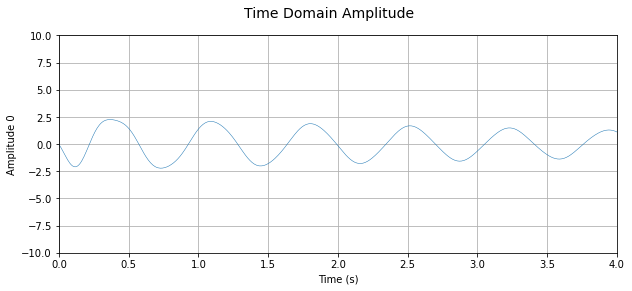

In [27]:
band = [2/u.Td, u.fs/32]

a = u.differentiate(band=band)#.differentiate(band=band)

a.plot_time(fig=2, figsize=[10,4], axis_t=[0, a.Td/2, -10, 10]);


### 3) Trampolim sem a pessoa

A partir do momento em que o trampolim está oscilando sem a pessoa sua frequência natural aumenta, 
porque embora a rigidez permaneça a mesma a massa aderida diminui.


In [86]:
wnt = np.sqrt(k/mt)
fnt = wnt/2/np.pi
Tnt = 1/fnt

print('Período de vibração pessoa+trampolin:     {0:5.2f} s.'.format(Tn))
print('Período de vibração só trampolim:         {0:5.2f} s.'.format(Tnt))


Período de vibração pessoa+trampolin:      0.71 s.
Período de vibração só trampolim:          0.32 s.


Portanto o período reduz-se para aproximadamente a metade.


### 4) Máximas reações de apoio

As máximas reações podem ser estimadas a partir da força estática equivalente. 
Para isso, vamos usar o deslocamento máximo (superestimado) do item (1).


In [90]:
Feq = umax*k           # força estática equivalente

MA  = L*Feq            # momento reativo
VA  = Feq              # reação vertical

print('Momento reativo no engaste: {0:5.0f} Nm.'.format(MA))
print('Reação vertical no engaste: {0:5.0f} N.'.format(VA))


Momento reativo no engaste:  7391 Nm.
Reação vertical no engaste:  3696 N.


Contudo, o valor correto calculado a partir da solução por Duhamel (não exigida na prova) seria:

In [91]:
Feq = u_pk*k           # força estática equivalente

MA  = L*Feq            # momento reativo
VA  = Feq              # reação vertical

print('Momento reativo no engaste: {0:5.0f} Nm.'.format(MA))
print('Reação vertical no engaste: {0:5.0f} N.'.format(VA))


Momento reativo no engaste:  5949 Nm.
Reação vertical no engaste:  2974 N.


## Questão 2

Um carrinho se desloca com velocidade estacionária $v$ sobre uma superfície com relevo senoidal, cujo comprimento de onda (igual à distância entre as rodas) é $\lambda_0 = 2$m e amplitude (zero-a-pico) $h = 0,1$m. Sobre o carrinho é transportada uma massa $m = 200$kg, que está suportada por um console elástico cujo amortecimento é $\zeta = 1$% (razão do crítico). Considere que a massa do carrinho é desprezável. 

5. Admitindo inicialmente um console rígido, qual a máxima velocidade $v_{\rm MAX}$ que o carrinho pode atingir antes que as rodas percam contato com a superfície. 
6. Para $v = v_{\rm MAX}/2$, determine a rigidez da mola k de modo que a amplitude total de vibração da massa (zero-a-pico) seja no máximo igual a $2h$.
7. Para a rigidez $k$ calculada, determine a máxima e a mínima forças de reação vertical $R$ em cada roda durante o movimento.

<img src="resources/tests/PEC00025A_231_P1_Q2.jpg" alt="Question 2" width="480px"/>  


### Cálculo das propriedades do sistema


In [28]:
h  =  0.1            # amplitude do deslocamento na base
L0 =  2.             # comprimento do trampolim (m)
m  =  200.           # massa oscilante total (kg)
zt =  0.01           # amortecimento razão do crítico
g  =  9.81           # gravidade (m/s2)


### 2.1 Velocidade máxima

Com a mola considerada rígida, a massa acompanha o relevo do terreno. Isso implica em um deslocamento da base
igual ao deslocamento da massa com uma frequência igual a $f_0 = v_{\rm max}/\lambda_0$.
O deslocamento vertical é uma função harmônica:

$$ u(t) = h \sin (2\pi f_0 t) = h \sin \left( \frac{2\pi v_{\rm max} t}{\lambda_0} \right) $$


O critério para que o carrinho não descole do terreno é a aceleração vertical não superar a gravidade.
A aceleração é a segunda derivada do deslocamento.

$$ a = - h \left(\frac{2\pi v_{\rm max}}{\lambda_0} \right)^2 \sin \left( \frac{2\pi v_{\rm max} t}{\lambda_0} \right)  > -g $$

Portanto o limite de velocidade é dado por:

$$ h \left(\frac{2\pi v_{\rm max}}{\lambda_0} \right)^2 = g $$

Que resulta em:

$$ v_{\rm max} = \frac{\lambda_0}{2\pi} \sqrt{\frac{g}{h}}$$


In [30]:
vmax = (L0/2/np.pi)*np.sqrt(g/h)

print('Máxima velocidade para manter contato:    {0:5.2f} m/s.'.format(vmax))


Máxima velocidade para manter contato:     3.15 m/s.


### 2.2 Amplitude de vibração para velocidade $v_{\rm max}/2$